In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Collecting Dataset**


In [3]:
df = pd.read_excel("Customer Conversion Prediction.xlsx")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Data Cleaning

In [6]:
#Since our ML model works on numeric data, using LabelEncoder to convert text dataset to numeric
# Let's perform label encoding on all object columns using MAP function
import numpy as np
objList = df.select_dtypes(include = "object").columns
for column1 in objList:
  ordinal_label = {k: i for i, k in enumerate(df[column1].unique(), 0)}
  df[column1] = df[column1].map(ordinal_label).astype(int)

In [7]:
df.dtypes

age               int64
job               int32
marital           int32
education_qual    int32
call_type         int32
day               int64
mon               int32
dur               int64
num_calls         int64
prev_outcome      int32
y                 int32
dtype: object

In [8]:
df["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [9]:
#Segregating Dataset into X & Y

X = df.drop("y",axis=1)  #Feature Matrix
Y = df["y"] 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
x_train.shape, x_test.shape

#other Ways to handle data imbalance --> SMOTE, ROSE

((36168, 10), (9043, 10))

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)

# Draw heatmap

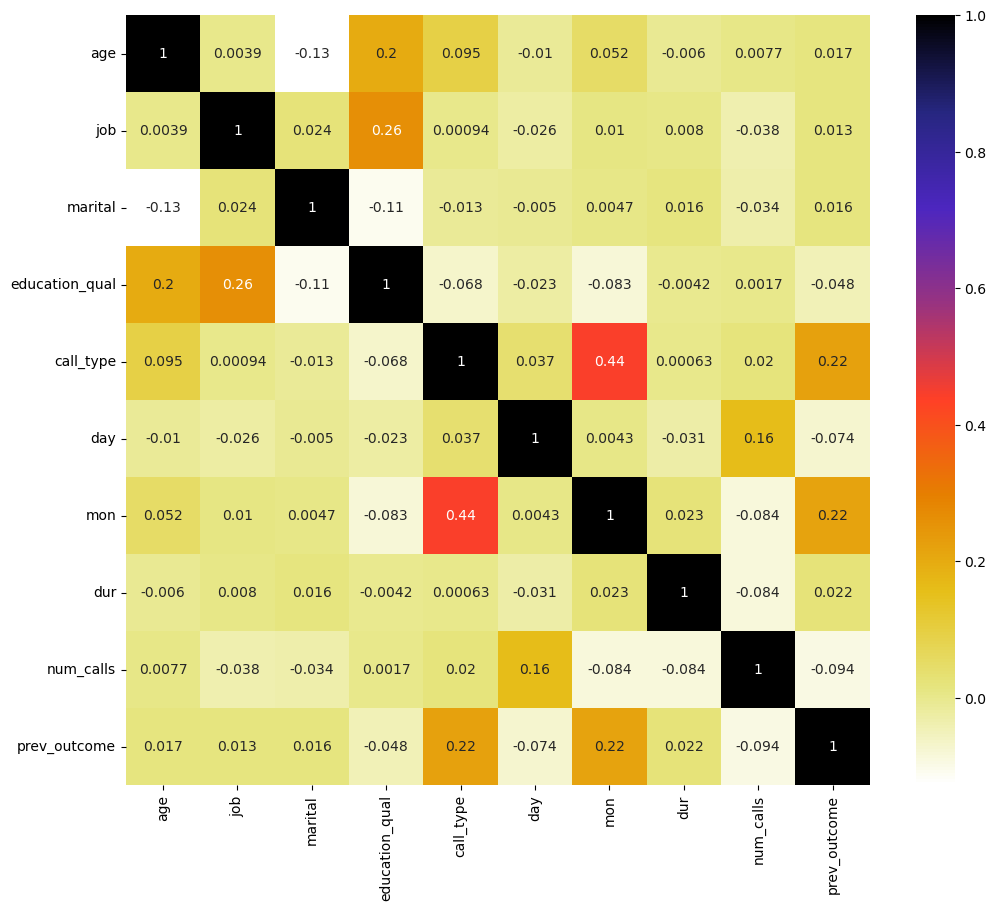

In [12]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr_map = x_train.corr()
sns.heatmap(corr_map, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(x_train, 0.40)
len(set(corr_features))

1

In [15]:
corr_features

{'mon'}

In [16]:
### Used the Variance threshold function to check, if there are any constant columns that can be removed. But there are no constant columns.


from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [18]:
import pandas as pd
dataset = pd.read_excel("Customer Conversion Prediction.xlsx")

In [19]:
dataset.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [20]:
df_mutual_info = x_train.drop("dur", axis=1)
df_mutual_info.describe()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.981697,3.526598,0.513741,1.046726,0.775907,15.792247,2.945781,2.757880,0.290367
std,10.628617,3.104303,0.693359,0.968253,0.549553,8.318688,3.182353,3.077423,0.699303
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,1.000000,16.000000,2.000000,2.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,1.000000,21.000000,5.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,2.000000,31.000000,11.000000,63.000000,3.000000


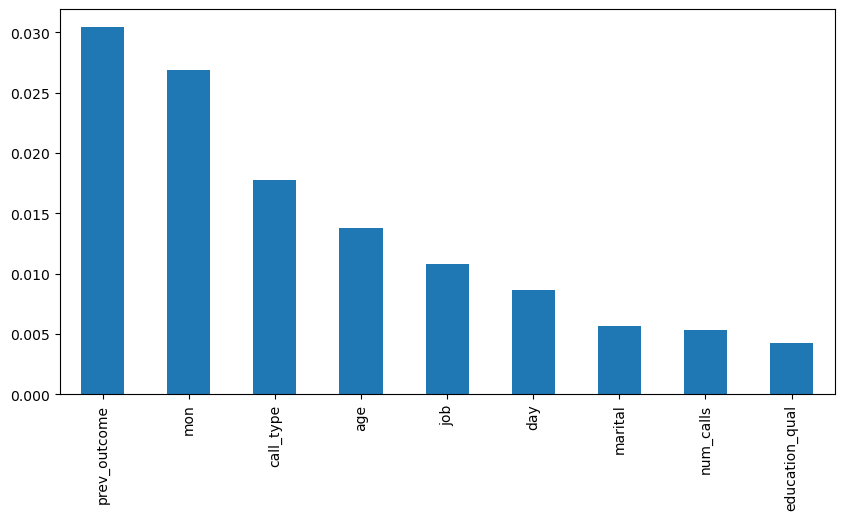

In [21]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information

mutual_info = mutual_info_classif(df_mutual_info, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_mutual_info.columns
# mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.show()

In [22]:
#No we Will select the  top 5 important features

from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['age', 'call_type', 'mon', 'dur', 'prev_outcome'], dtype='object')

In [24]:
dataset = pd.read_excel("Customer Conversion Prediction.xlsx")
dataset

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [26]:
df_final = dataset.drop("day", axis=1)
df_final

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,nov,508,4,unknown,no


In [27]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,0,0,0,0,5,0,261,1,0,0
1,44,1,1,1,0,5,0,151,1,0,0
2,33,2,0,1,0,5,0,76,1,0,0
3,47,3,0,2,0,5,0,92,1,0,0
4,33,4,1,2,0,5,0,198,1,0,0


# Label Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder

#Map output class(Text) --> Numeric 
df_final["y"] = df_final["y"].map({"no": 0, "yes": 1}).astype(int)
objList = df_final.select_dtypes(include = "object").columns
df_final = pd.get_dummies(df, columns = objList.values)
df_final.columns

Index(['age', 'day', 'dur', 'num_calls', 'y', 'job_0', 'job_1', 'job_2',
       'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
       'job_11', 'marital_0', 'marital_1', 'marital_2', 'education_qual_0',
       'education_qual_1', 'education_qual_2', 'education_qual_3',
       'call_type_0', 'call_type_1', 'call_type_2', 'mon_0', 'mon_1', 'mon_2',
       'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8', 'mon_9', 'mon_10',
       'mon_11', 'prev_outcome_0', 'prev_outcome_1', 'prev_outcome_2',
       'prev_outcome_3'],
      dtype='object')

In [31]:
#df_final["y"] = df_final["y"].map({"no": 0, "yes": 1}).astype(int)
df_final

,age,day,dur,num_calls,y,job_0,job_1,job_2,job_3,job_4,...,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,prev_outcome_0,prev_outcome_1,prev_outcome_2,prev_outcome_3
0,58,5,261,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,5,151,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,5,92,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,5,198,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45207,71,17,456,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45208,72,17,1127,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45209,57,17,508,4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Split the dataset into Input & Output


In [32]:
X = df_final.drop("y", axis=1)
Y = df_final["y"]

# Sampling technique --> Stratified


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
x_train.shape, x_test.shape

((36168, 42), (9043, 42))

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
ada_model = AdaBoostClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
models_accuracy = []

models = [rf_model, lr_model, ada_model, knn_model, nb_model]
models_name = [str(i) for i in models]

pred = []
for model in models:
  model.fit(tr_x_train, y_train)
  y_train_pred = model.predict_proba(tr_x_train)
  train_accuracy = roc_auc_score(y_train, y_train_pred[:,-1]) * 100
  y_test_pred = model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy of Model: {} for train: {} %, test: {} %".format(str(model), train_accuracy, test_accuracy))
  models_accuracy.append(test_accuracy)
  pred.append(pd.Series(y_test_pred[:,-1]))

df_models_output = pd.concat(pred, axis=1)
df_models_output.columns = models_name


#Create a dataframe of all the model accuracy for a paricular sample

df_models_output["final_prediction"] = df_models_output.mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, df_models_output["final_prediction"])))
     

Accuracy of Model: RandomForestClassifier() for train: 100.0 %, test: 92.31340545185739 %
Accuracy of Model: LogisticRegression() for train: 90.43163054254319 %, test: 90.07220532827974 %
Accuracy of Model: AdaBoostClassifier() for train: 90.96712516333064 %, test: 90.34779294352715 %
Accuracy of Model: KNeighborsClassifier() for train: 95.52036745528768 %, test: 81.32538206680057 %
Accuracy of Model: GaussianNB() for train: 81.61175592632821 %, test: 81.24628763998659 %
Ensemble test roc-auc: 0.9091745747283719


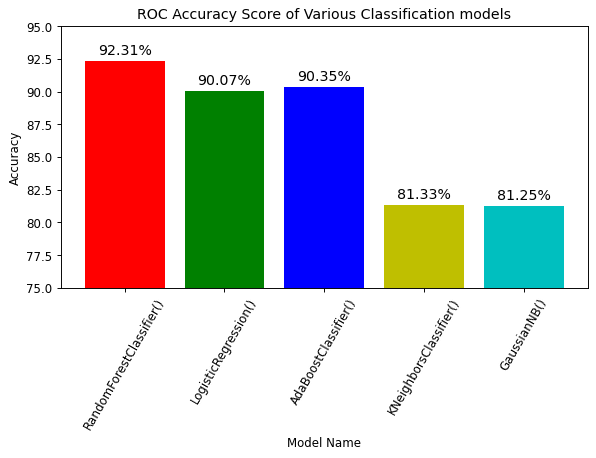

In [36]:
from seaborn import colors
plt.figure(figsize=(8,4), dpi=85)
plt.bar(models_name, models_accuracy, color=list("rgbyc"))
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("ROC Accuracy Score of Various Classification models")
for index, data in enumerate(models_accuracy):
  plt.text(x=index, y=data+0.5, s=f"{data.round(2)}%", ha="center", fontsize=12)
plt.ylim(75, 95)
plt.xticks(rotation=60)
plt.show()

# Hyperparameter Tuning


In [42]:
from sklearn.ensemble import RandomForestClassifier
for i in range(10,20):
  rf_hyper_model = RandomForestClassifier(random_state = 24, n_jobs = -1, n_estimators=i, max_features=None, min_samples_split=i+6)
  rf_hyper_model.fit(tr_x_train, y_train)
  y_test_hyper = rf_hyper_model.predict(tr_x_test)
  y_test_pred = rf_hyper_model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy for n_estimator={}, min_sample_split={} is {} & {}".format(i, i+6, accuracy_score(y_test_hyper, y_test) * 100, test_accuracy))
     

Accuracy for n_estimator=10, min_sample_split=16 is 90.12495853146079 & 92.0995948215759
Accuracy for n_estimator=11, min_sample_split=17 is 90.23554130266504 & 92.25984922107021
Accuracy for n_estimator=12, min_sample_split=18 is 90.31294924250803 & 92.37272035349835
Accuracy for n_estimator=13, min_sample_split=19 is 90.27977441114675 & 92.4927469155896
Accuracy for n_estimator=14, min_sample_split=20 is 90.32400751962845 & 92.56598797603729
Accuracy for n_estimator=15, min_sample_split=21 is 90.33506579674886 & 92.56425386446467
Accuracy for n_estimator=16, min_sample_split=22 is 90.2134247484242 & 92.54851073551188
Accuracy for n_estimator=17, min_sample_split=23 is 90.34612407386929 & 92.60271207947794
Accuracy for n_estimator=18, min_sample_split=24 is 90.35718235098972 & 92.59168005227193
Accuracy for n_estimator=19, min_sample_split=25 is 90.39035718235098 & 92.59411846171875


# Adaboost hyperparameter tuning


In [43]:
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

for i in range(95,105):
  ada_hyper_model = AdaBoostClassifier(n_estimators=i, random_state=0)
  ada_hyper_model.fit(tr_x_train, y_train)
  y_test_hyper = ada_hyper_model.predict(tr_x_test)
  y_test_pred = ada_hyper_model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy for n_estimator={} is {} & {}".format(i, accuracy_score(y_test_hyper, y_test) * 100, test_accuracy))
     

Accuracy for n_estimator=95 is 89.88167643481145 & 90.494458536978
Accuracy for n_estimator=96 is 89.89273471193188 & 90.50004557221538
Accuracy for n_estimator=97 is 89.87061815769103 & 90.52344720074146
Accuracy for n_estimator=98 is 89.88167643481145 & 90.5466890305902
Accuracy for n_estimator=99 is 89.91485126617273 & 90.53797704344039
Accuracy for n_estimator=100 is 89.92590954329316 & 90.55278505420728
Accuracy for n_estimator=101 is 89.94802609753401 & 90.58353742189101
Accuracy for n_estimator=102 is 89.94802609753401 & 90.55151850172759
Accuracy for n_estimator=103 is 89.93696782041359 & 90.57418624003182
Accuracy for n_estimator=104 is 89.93696782041359 & 90.56308319119142


# Confusion Matrix


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rf_model.predict(tr_x_test)
# cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(7733, 252, 625, 433)

In [44]:
confusion_matrix(y_test, y_pred)


array([[7733,  252],
       [ 625,  433]], dtype=int64)

In [45]:
df_models_output


,RandomForestClassifier(),LogisticRegression(),AdaBoostClassifier(),KNeighborsClassifier(),GaussianNB(),final_prediction
0,0.05,0.075191,0.481355,0.0,7.647914e-01,0.274268
1,0.00,0.008148,0.479016,0.0,6.959333e-08,0.097433
2,0.00,0.011941,0.469092,0.0,5.659509e-10,0.096207
3,0.01,0.007087,0.457185,0.0,2.928660e-06,0.094855
4,0.01,0.058807,0.475149,0.0,1.630583e-01,0.141403
...,...,...,...,...,...,...
9038,0.36,0.175925,0.494854,0.4,3.486967e-04,0.286226
9039,0.00,0.006735,0.463142,0.0,1.365944e-07,0.093975
9040,0.30,0.081108,0.487477,0.0,2.256759e-01,0.218852
9041,0.10,0.003976,0.458826,0.0,5.545916e-08,0.112560


In [48]:
#Calculate ROC curve

fpr, tpr, thresholds = roc_curve(y_test,df_models_output["RandomForestClassifier()"].values)
len(thresholds)

95

In [47]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
  y_pred = np.where(df_models_output["final_prediction"].values > thres, 1, 0)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_ls.append(accuracy)

threshold_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
threshold_accuracy.columns = ["Threshold", "Accuracy"]
threshold_accuracy.sort_values(by="Accuracy", ascending=False, inplace=True)
threshold_accuracy.head()

,Threshold,Accuracy
34,0.60,0.901139
35,0.59,0.901028
36,0.58,0.900918
33,0.61,0.900697
40,0.54,0.900365


# Best threshold value for max Accuracy


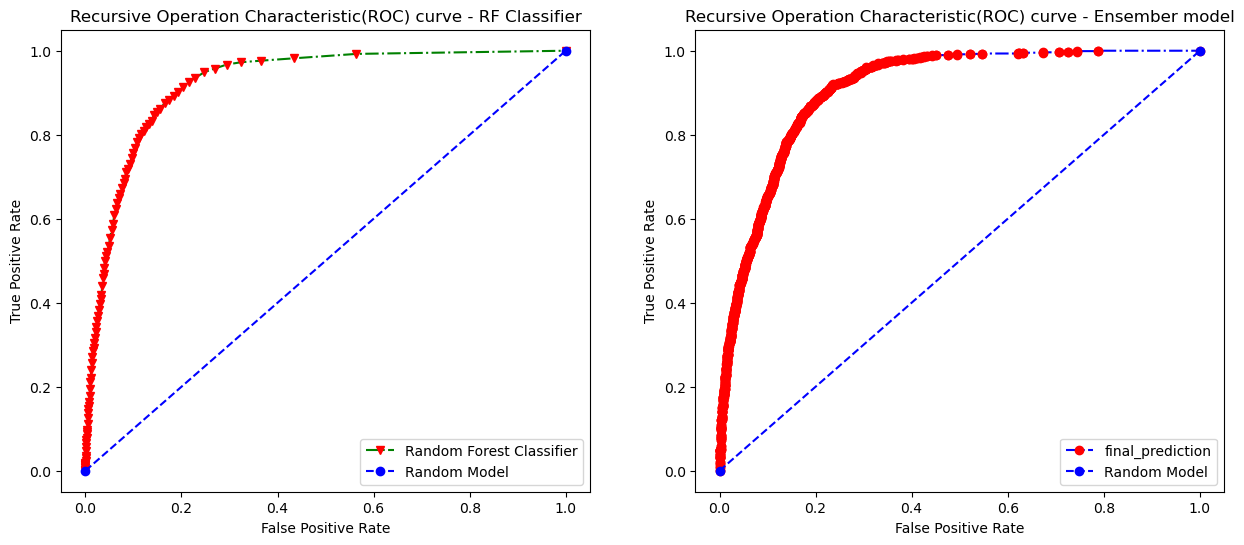

In [49]:
fpr, tpr, threshold = roc_curve(y_test, df_models_output["RandomForestClassifier()"])
fpr_fi, tpr_fi, threshold1 = roc_curve(y_test, df_models_output["final_prediction"])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, "g-.v", mfc="r", mec="r", label="Random Forest Classifier")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve - RF Classifier")
plt.legend()
plt.subplot(1,2,2)
plt.plot(fpr_fi, tpr_fi, "b-.o", mfc="r", mec="r", label="final_prediction")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve - Ensember model")
plt.show()

In [50]:
models = [rf_model, lr_model, ada_model, knn_model, nb_model]
models_name = [str(i) for i in models]

models_accuracy = []
for model in models:
  y_pred = model.predict(tr_x_test)
  test_accuracy = accuracy_score(y_test, y_pred) * 100
  print("Accuracy of Model: {} is {} %".format(str(model), test_accuracy))
  models_accuracy.append(test_accuracy)

Accuracy of Model: RandomForestClassifier() is 90.30189096538759 %
Accuracy of Model: LogisticRegression() is 90.06966714585867 %
Accuracy of Model: AdaBoostClassifier() is 89.98120092889528 %


C:\Users\chand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of Model: KNeighborsClassifier() is 89.29558774742895 %
Accuracy of Model: GaussianNB() is 86.56419329868406 %


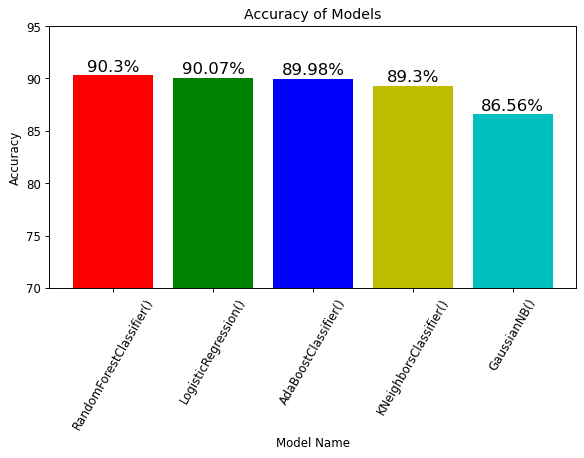

In [51]:
plt.figure(figsize=(8,4), dpi=85)
plt.bar(models_name, models_accuracy, color=list("rgbyc"))
plt.ylim(70,95)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
for index, data in enumerate(models_accuracy):
  plt.text(x=index, y=data+0.4, s=f"{data.round(2)}%", ha="center", fontsize=14)
plt.xticks(rotation=60)
plt.show()

# Export model to a pickle file for reusing the model for prediction


In [52]:
#Extract the model to a Pickle file

import pickle
pickle_out = open("rf_model.pkl", "wb")
pickle.dump(rf_hyper_model, pickle_out)
pickle_out.close

<function BufferedWriter.close>